In [1]:
from tools import SourceFunctions
from interface import SpectraInterface
import numpy as np
import matplotlib.pyplot as plt
from fieldmaptrack import Beam

### Generate a field defined by user

[ 1968.23800031  3936.47600062  5904.71400093  7872.95200124
  9841.19000155 11809.42800186 13777.66600217 15745.90400248
 17714.14200279]


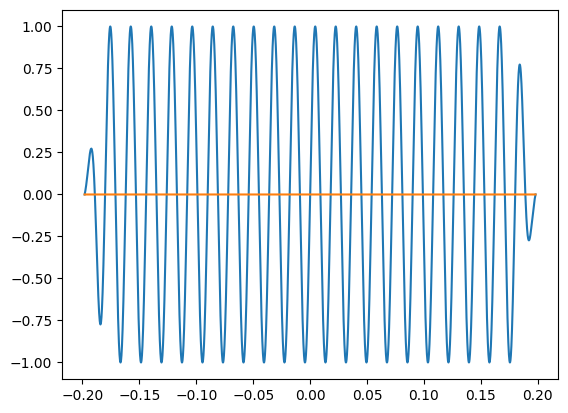

In [2]:
beam = Beam(3)
gamma = beam.gamma

sf = SourceFunctions()
period = 18
bx_peak = 0
by_peak = 1

field = sf.create_field_profile(20, period, bx_peak, by_peak, 201)

kx = sf.undulator_b_to_k(bx_peak, period)
ky = sf.undulator_b_to_k(by_peak, period)
k = np.sqrt(kx**2 + ky**2)
theta = 0.0
n = np.arange(1, 10, 1)
energy = sf.get_harmonic_energy(n, gamma, theta, period, k)
print(energy)

rz = field[:, 0]
bx = field[:, 1]
by = field[:, 2]

plt.plot(rz, bx)
plt.plot(rz, by)

#### Create an object to calc flux

In [3]:
spectra = SpectraInterface()

spectra.accelerator.set_low_beta_section()

#  Select source defined by user
spectra.calc_flux.source_type = spectra.calc_flux.SourceType.user_defined
spectra.calc_flux.field = field


#### Calc flux density - spectrum

Calculation Status: elapsed time: 0.8 s


Text(0, 0.5, 'ph/s/mm^2/0.1%B.W.')

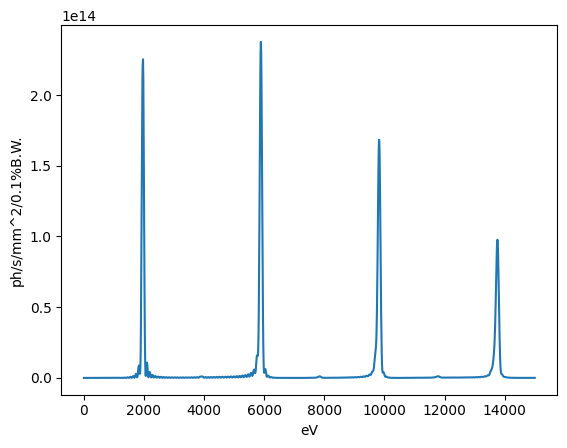

In [4]:
# Calc flux density
spectra.calc_flux.indep_var = spectra.calc_flux.CalcConfigs.Variable.energy
spectra.calc_flux.energy_range = [1, 15000]
spectra.calc_flux.energy_step = 10
spectra.calc_flux.observation_angle = [0, 0]

# Set configuration
spectra.calc_flux.set_config()
spectra.calc_flux.run_calculation()

plt.plot(spectra.calc_flux.output_variables[0, :], spectra.calc_flux.output_data[0, :])
plt.xlabel(spectra.calc_flux.output_captions['units'][0])
plt.ylabel(spectra.calc_flux.output_captions['units'][1])

#### Calc flux slit - spectrum

elapsed time: 1.9 s


Text(0, 0.5, 'ph/s/0.1%B.W.')

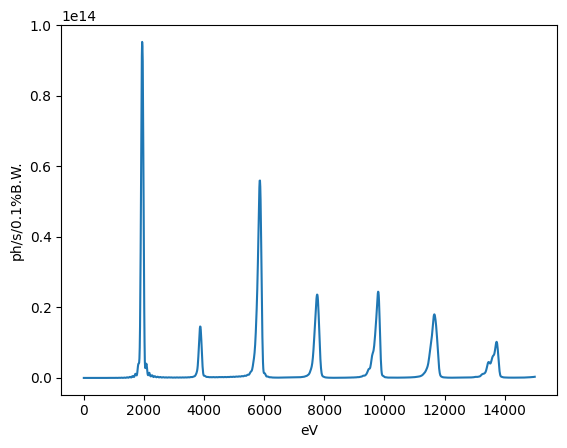

In [7]:
# Calc partial flux circular slit
spectra.calc_flux.indep_var = spectra.calc_flux.CalcConfigs.Variable.energy
spectra.calc_flux.output_type = spectra.calc_flux.CalcConfigs.Output.flux
spectra.calc_flux.slit_shape = spectra.calc_flux.CalcConfigs.SlitShape.circular
spectra.calc_flux.slit_acceptance = [0.0, 0.04]
spectra.calc_flux.set_config()
spectra.calc_flux.run_calculation()

plt.plot(spectra.calc_flux.output_variables[0, :], spectra.calc_flux.output_data[0, :])
plt.xlabel(spectra.calc_flux.output_captions['units'][0])
plt.ylabel(spectra.calc_flux.output_captions['units'][1])


elapsed time: 2.0 s
elapsed time: 1.1 s


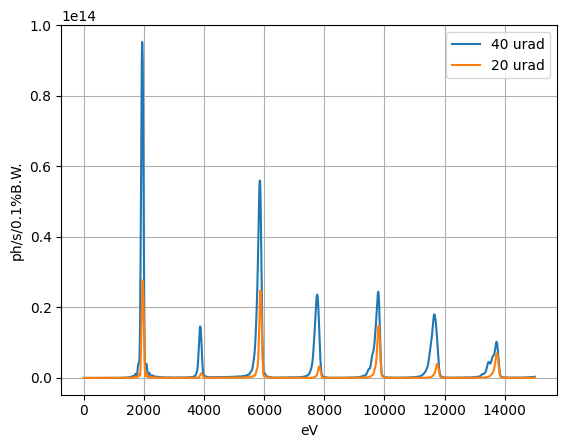

In [6]:
# Comparing flux for two different slits
spectra.calc_flux.indep_var = spectra.calc_flux.CalcConfigs.Variable.energy
spectra.calc_flux.output_type = spectra.calc_flux.CalcConfigs.Output.flux
spectra.calc_flux.slit_shape = spectra.calc_flux.CalcConfigs.SlitShape.circular

spectra.calc_flux.slit_acceptance = [0.0, 0.04]
spectra.calc_flux.set_config()
spectra.calc_flux.run_calculation()
energies = spectra.calc_flux.output_variables[0, :]
flux0 = spectra.calc_flux.output_data[0, :]

spectra.calc_flux.slit_acceptance = [0.0, 0.02]
spectra.calc_flux.set_config()
spectra.calc_flux.run_calculation()
flux1 = spectra.calc_flux.output_data[0, :]

plt.plot(energies, flux0, label='40 urad')
plt.plot(energies, flux1, label='20 urad')
plt.xlabel(spectra.calc_flux.output_captions['units'][0])
plt.ylabel(spectra.calc_flux.output_captions['units'][1])
plt.legend()
plt.grid()

#### Calc spatial distribution of flux

In [4]:
spectra.calc_flux.indep_var = spectra.calc_flux.CalcConfigs.Variable.mesh_xy
spectra.calc_flux.output_type = spectra.calc_flux.CalcConfigs.Output.flux_density
spectra.accelerator.zero_emittance = True
spectra.accelerator.zero_energy_spread = True
spectra.calc_flux.target_energy = 5850
spectra.calc_flux.x_range = [-0.05, 0.05]
spectra.calc_flux.y_range = [-0.05, 0.05]
spectra.calc_flux.x_nr_pts = 51
spectra.calc_flux.y_nr_pts = 51
spectra.calc_flux.set_config()
spectra.calc_flux.run_calculation()


elapsed time: 4.7 s
Calculation Status: 

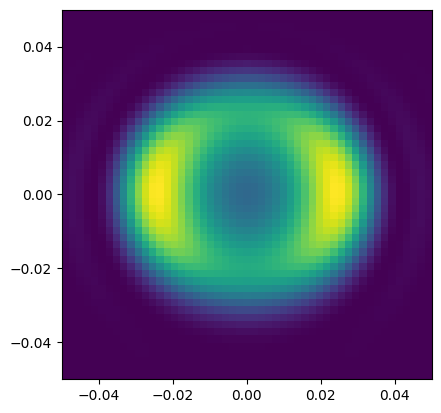

In [5]:
# Example of detuned beam
x = spectra.calc_flux.output_variables[0, :]
y = spectra.calc_flux.output_variables[1, :]

flux = spectra.calc_flux.output_data[0, :]
flux = np.reshape(flux, (len(x), len(y)))
flux = np.flip(flux, axis=0)
plt.imshow(flux, extent=[x[0], x[-1], y[0], y[-1]])

elapsed time: 4.6 s


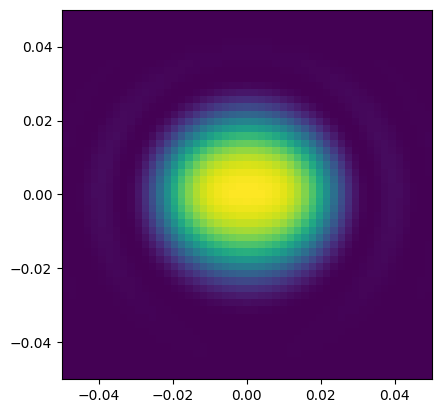

In [9]:
# Example of ressonant beam
spectra.calc_flux.target_energy = 5904
spectra.calc_flux.set_config()
spectra.calc_flux.run_calculation()
flux2 = spectra.calc_flux.output_data[0, :]
flux2 = np.reshape(flux2, (len(x), len(y)))
flux = np.flip(flux, axis=0)
plt.imshow(flux2, extent=[x[0], x[-1], y[0], y[-1]])

In [6]:
# Obtaining spectrum using spatial flux distribution
spectra.calc_flux.indep_var = spectra.calc_flux.CalcConfigs.Variable.mesh_xy
spectra.calc_flux.output_type = spectra.calc_flux.CalcConfigs.Output.flux_density
spectra.calc_flux.x_range = [-0.02, 0.02]
spectra.calc_flux.y_range = [-0.02, 0.02]
spectra.accelerator.zero_emittance = True
spectra.accelerator.zero_energy_spread = True
energies = np.linspace(5700, 6000, 20)
flux = np.zeros(len(energies))
for i, energy in enumerate(energies):
    print(energy)
    spectra.calc_flux.target_energy = energy
    spectra.calc_flux.set_config()
    spectra.calc_flux.run_calculation()
    x = spectra.calc_flux.output_variables[0, :]
    y = spectra.calc_flux.output_variables[1, :]
    flux_density = spectra.calc_flux.output_data[0, :]
    flux_density = np.reshape(flux_density, (len(x), len(y)))
    flux[i] = np.sum(flux_density)


5700.0
elapsed time: 4.7 s
5715.789473684211
elapsed time: 4.6 s
5731.578947368421
elapsed time: 4.6 s
5747.368421052632
elapsed time: 4.5 s
5763.1578947368425
elapsed time: 4.5 s
5778.9473684210525
elapsed time: 4.5 s
5794.736842105263
elapsed time: 4.5 s
5810.526315789473
elapsed time: 4.5 s
5826.315789473684
elapsed time: 4.5 s
5842.105263157895
elapsed time: 4.9 s
5857.894736842105
elapsed time: 4.5 s
5873.684210526316
elapsed time: 4.6 s
5889.473684210527
elapsed time: 4.5 s
5905.263157894737
elapsed time: 4.7 s
5921.0526315789475
elapsed time: 4.7 s
5936.8421052631575
elapsed time: 4.6 s
5952.631578947368
elapsed time: 4.5 s
5968.421052631579
elapsed time: 4.7 s
5984.210526315789
elapsed time: 4.5 s
6000.0
elapsed time: 4.6 s


Text(0.5, 0, 'Energy [eV]')

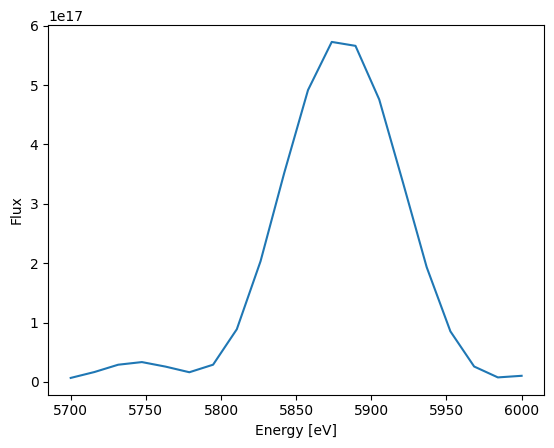

In [7]:
plt.plot(energies, flux)
plt.ylabel("Flux")
plt.xlabel("Energy [eV]")

### Calc flux of a pre configured undulator

In [2]:
period = 18
bx_peak = 0.25
by_peak = 1
id_length = 0.4
beam = Beam(3)
gamma = beam.gamma

spectra = SpectraInterface()

spectra.accelerator.set_low_beta_section()

#  Select horizontal undulator as source
spectra.calc_flux.source_type = (
    spectra.calc_flux.SourceType.vertical_figure8_undulator
)

spectra.calc_flux.period = period
spectra.calc_flux.bx_peak = bx_peak
spectra.calc_flux.by_peak = by_peak
spectra.calc_flux.id_length = id_length

In [4]:
sf = SourceFunctions()
kx = sf.undulator_b_to_k(bx_peak, period)
ky = sf.undulator_b_to_k(by_peak, 2*period)
k = np.sqrt(kx**2 + ky**2)  # helical undulator
n = np.arange(1, 10, 1)
energy = sf.get_harmonic_energy(n, gamma, 0, period, k)
print(energy)


[ 704.6999803 1409.3999606 2114.0999409 2818.7999212 3523.4999015
 4228.1998818 4932.8998621 5637.5998424 6342.2998227]


#### Flux density

Calculation Status: elapsed time: 33.3 s


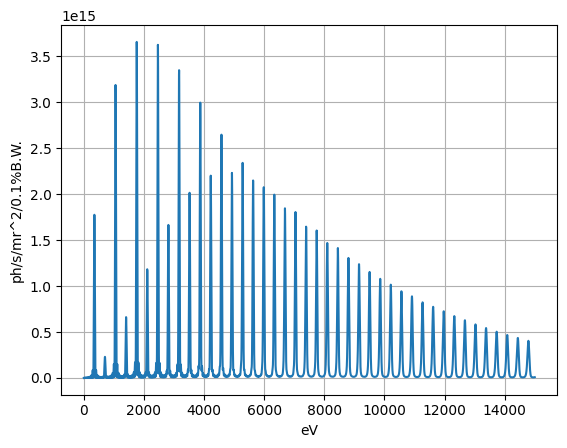

In [5]:
spectra.calc_flux.indep_var = spectra.calc_flux.CalcConfigs.Variable.energy
spectra.calc_flux.output_type = (
    spectra.calc_flux.CalcConfigs.Output.flux_density
)
spectra.accelerator.zero_emittance = False
spectra.accelerator.zero_energy_spread = False
spectra.calc_flux.method = spectra.calc_flux.CalcConfigs.Method.far_field
spectra.calc_flux.observation_angle = [0, 0]
spectra.calc_flux.energy_range = [1, 15000]
spectra.calc_flux.energy_step = 1
spectra.calc_flux.set_config()
spectra.calc_flux.run_calculation()

plt.plot(
    spectra.calc_flux.output_variables[0, :],
    spectra.calc_flux.output_data[0, :],
)
plt.xlabel(spectra.calc_flux.output_captions["units"][0])
plt.ylabel(spectra.calc_flux.output_captions["units"][1])
plt.grid()

elapsed time: 19.4 s
elapsed time: 13.0 s


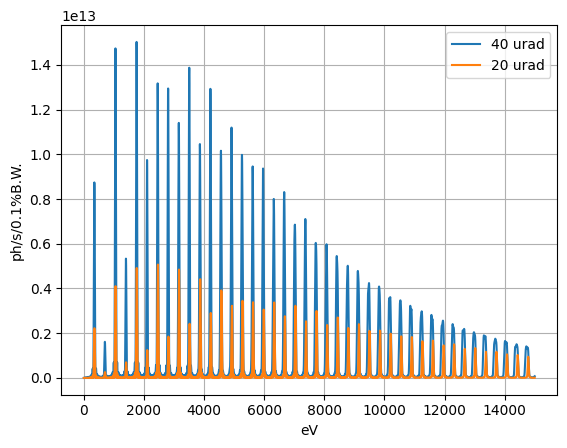

In [7]:
spectra.calc_flux.indep_var = spectra.calc_flux.CalcConfigs.Variable.energy
spectra.calc_flux.output_type = (
    spectra.calc_flux.CalcConfigs.Output.flux
)
spectra.calc_flux.slit_shape = spectra.calc_flux.CalcConfigs.SlitShape.circular
spectra.accelerator.zero_emittance = True
spectra.accelerator.zero_energy_spread = True
spectra.calc_flux.method = spectra.calc_flux.CalcConfigs.Method.far_field
spectra.calc_flux.observation_angle = [0, 0]
spectra.calc_flux.slit_acceptance = [0, 0.04]
spectra.calc_flux.energy_range = [1, 15000]
spectra.calc_flux.energy_step = 1
spectra.calc_flux.set_config()
spectra.calc_flux.run_calculation()
flux0 = spectra.calc_flux.output_data[0, :]

spectra.calc_flux.slit_acceptance = [0, 0.02]
spectra.calc_flux.set_config()
spectra.calc_flux.run_calculation()
flux1 = spectra.calc_flux.output_data[0, :]


plt.plot(spectra.calc_flux.output_variables[0, :], flux0, label='40 urad')
plt.plot(spectra.calc_flux.output_variables[0, :], flux1, label='20 urad')
plt.xlabel(spectra.calc_flux.output_captions['units'][0])
plt.ylabel(spectra.calc_flux.output_captions['units'][1])
plt.legend()
plt.grid()

In [13]:
spectra.calc_flux.indep_var = spectra.calc_flux.CalcConfigs.Variable.mesh_xy
spectra.calc_flux.output_type = (
    spectra.calc_flux.CalcConfigs.Output.flux_density
)
spectra.accelerator.zero_emittance = True
spectra.accelerator.zero_energy_spread = True
spectra.calc_flux.target_energy = 3523
spectra.calc_flux.x_range = [-0.05, 0.05]
spectra.calc_flux.y_range = [-0.05, 0.05]
spectra.calc_flux.x_nr_pts = 201
spectra.calc_flux.y_nr_pts = 201
spectra.calc_flux.set_config()
spectra.calc_flux.run_calculation()

elapsed time: 8.1 s


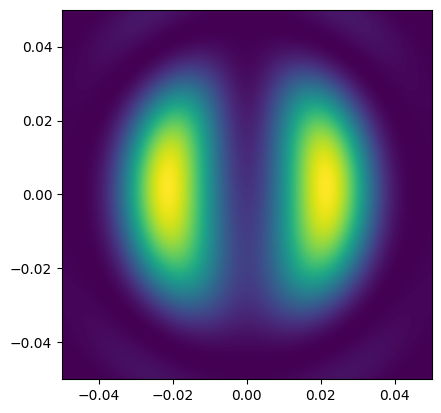

In [23]:
x = spectra.calc_flux.output_variables[0, :]
y = spectra.calc_flux.output_variables[1, :]

flux = spectra.calc_flux.output_data[0, :]
flux = np.reshape(flux, (len(x), len(y)))
flux = np.flip(flux, axis=0)
plt.imshow(flux, extent=[x[0], x[-1], y[0], y[-1]])

In [20]:
flux.shape

(201, 201)